Problems to solve


In [2]:
#first problem -> Knapsack

def knapsack_problem(obj_importance : list, obj_size : list, space_available : int):

    #init of our variables that are to be used
    obj_value : int = len(obj_importance)
    obj_taille : int = len(obj_size)
    sp = space_available
    
    #Creation of a list to handle what object is to be taken
    obj_taken = []
    for _ in range(obj_taille):
        obj_taken.append([False] * (space_available + 1))

    val_max = [0] * (sp + 1)

    for i in range(obj_value):
        for j in range(sp,obj_size[i],-1):
            #if we take an object i, we calculate the new value
            if val_max[j] != max(val_max[j], val_max[j - obj_size[i]] + obj_importance[i]):
                obj_taken[i][j] = True
            val_max[j] = max(val_max[j], val_max[j - obj_size[i]] + obj_importance[i])
    
    #now that we have done the first part, we move on to the choice of our objects
    index_of_obj = []
    t = sp
    for i in range(obj_value - 1, -1, -1):
        if obj_taken[i][t]:
            index_of_obj.append(i)
            t -= obj_size[i]

    index_of_obj.reverse()
    return index_of_obj, val_max[sp]

Test phase !

In [3]:
obj_importance = [60, 100, 120, 80, 30]
obj_size = [10, 20, 30, 15, 5]
space_available = 50


objc_taken, max_value = knapsack_problem(obj_importance, obj_size, space_available)
print("List of taken objects : ", objc_taken)
print("Max Value : ", max_value)

List of taken objects :  [0, 1, 3]
Max Value :  240


linked list


In [4]:


#problem 2 -> to fusion sorted linked list

class Node:
    def __init__(self, val : int):
        if not isinstance(val,int):
             raise ValueError("Val must be of type int here \n")
        self._val = val
        self._next = None
    @property
    def val(self):
        return self._val
    @property
    def next(self):
        return self._next
    
    @val.setter
    def val(self,new_value):
        if not isinstance(new_value,int):
            raise ValueError("Must be an int")
        self._val = new_value
        
    @next.setter
    def next(self,new_next):
        self._next = new_next


def create_chained_list(list) -> list:
    head = None
    for val in reversed(list):
        node = Node(val)
        node.next = head
        head = node

    return head

def print_chained_list(head):
    values = []
    current = head
    while current:
        values.append(str(current.val))
        current = current.next
    print(" -> ".join(values))
'''
I use a mergin algorithm, since lists are already sorted out
I dont need to sort anything, therefore I create a function that merge two list
and repeat the process until there is no list left to be merged with another
and I return the process
we have n list, and the cost is n log(k) as we /2 the number of list to merge every time
'''

def merge_two_list(l1,l2):
    dummy = Node(0)
    current = dummy

    while l1 and l2: #here we use and as l1 and l2 are nodes and not list
        if l1.val < l2.val:
            current.next = l1
            l1 = l1.next
        else:
            current.next = l2
            l2 = l2.next
        current = current.next
    if l1 is not None:
        current.next = l1
    else:
        current.next = l2
    return dummy.next

def l_merging_for_k_list(lists):

    #cases for empty lists or 
    if len(lists) == 0:
        raise ValueError("No list to be found !")
    if len(lists) == 1:
        print("List already sorted out !")
        return lists
    

    while len(lists) > 1:
        l_final = []  
        for i in range(0,len(lists),2):
            l1 = lists[i]
            if i+1 < len(lists): # I impose this verification in case there is an odd number of lists
                l2 = lists[i+1]
            else:
                l2 = None
            l_final.append(merge_two_list(l1,l2))
        lists = l_final
    return l_final[0] # I return the chained linked list

Test phase

In [5]:
#test

ex_lists = [
    [1, 4, 5],
    [1, 3, 4],
    [2, 6],
    [3,6,42,45,65,80],
    [7,9,25,33,43]
]

ch_list = [create_chained_list(l) for l in ex_lists]

final = l_merging_for_k_list(ch_list)

#display results:

print_chained_list(final)




1 -> 1 -> 2 -> 3 -> 3 -> 4 -> 4 -> 5 -> 6 -> 6 -> 7 -> 9 -> 25 -> 33 -> 42 -> 43 -> 45 -> 65 -> 80


Backtracking problem


In [6]:
'''
Backtracking: Mind approach ? a 

Choices: All numbers in nums
Constraint: can't reuse the same number more than once in our path
Base Case: When the path length equals len(nums) which makes the first branch completed
Backtrack step : I do pop the last number added
Finally: I use backtracking([]) to start construction my list

Backtracking Template:
def backtrack(params):
    if base_case_condition:
        save_result
        return

    for choice in choices:
        if violates_constraints:
            continue

        make_choice
        backtrack(updated_params)
        undo_choice  # Backtracking Step
'''


class Permut:
    
    def permute(self,nums):
        result = []

        def backtracking(path):
        
            if len(path) == len(nums):
                result.append(path[:])
                return

            for n in nums:
                if n in path: continue
                path.append(n)
                backtracking(path)
                path.pop()
        backtracking([])
        return result

In [7]:
# Test
perms = Permut()

nums = [1,2,3]

print("Backtracking done\n")
print()
print(f"Done : {perms.permute(nums)}")


Backtracking done


Done : [[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]


Sudoku

In [8]:
import numpy as np
import matplotlib.pyplot as plt

'''

backtracking
    base case

    for
    constraint

    add
    backtracking
    pop


'''

def find_empty_cell(p):
     for i in range(9):
          for j in range(9):
            if p[i][j] == 0:
                return i,j
     return None

def is_valid(p,l,c,n):

    if n in p[l,:]:
        return False
    if n in p[:,c]:
        return False
    
    bl = (l//3)*3
    bc = (c//3)*3

    if n in p[bl:bl+3,bc:bc+3]:
        return False

    return True

def sudoku(puzzle):
   
     
    def backtracking():
        #base_case
        empty = find_empty_cell(puzzle)
        if empty is None:
            return True
        l, c = empty 
        
        #constraint
        for n in range(1, 10):

            if not is_valid(puzzle, l, c, n):
                continue
            #make choice
            puzzle[l][c] = n
            #backtracking
            if backtracking():
                return True
            #unmake choice
            puzzle[l][c] = 0   

        return False  

    backtracking()
    return puzzle




[[5 3 4 6 7 8 9 1 2]
 [6 7 2 1 9 5 3 4 8]
 [1 9 8 3 4 2 5 6 7]
 [8 5 9 7 6 1 4 2 3]
 [4 2 6 8 5 3 7 9 1]
 [7 1 3 9 2 4 8 5 6]
 [9 6 1 5 3 7 2 8 4]
 [2 8 7 4 1 9 6 3 5]
 [3 4 5 2 8 6 1 7 9]]


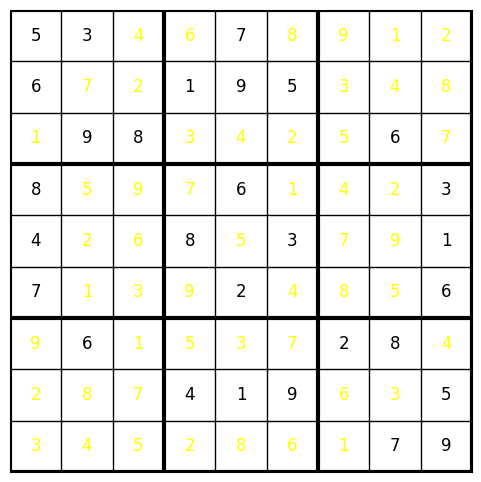

In [9]:
grid = np.array([
    [5,3,0, 0,7,0, 0,0,0],
    [6,0,0, 1,9,5, 0,0,0],
    [0,9,8, 0,0,0, 0,6,0],

    [8,0,0, 0,6,0, 0,0,3],
    [4,0,0, 8,0,3, 0,0,1],
    [7,0,0, 0,2,0, 0,0,6],

    [0,6,0, 0,0,0, 2,8,0],
    [0,0,0, 4,1,9, 0,0,5],
    [0,0,0, 0,0,0, 0,7,9],
])


solved = sudoku(grid.copy())
print(solved)

def showSudoku(puzzle,puzzled_solved):
    
    plt.figure(figsize=(6,6)) #window size
    ax = plt.gca() #get current axe

    ax.imshow(np.ones((9,9)),cmap="gray_r") #display the matrix as an image and the gray_r just means reversed so white -> black

    ax.set_xticks([])
    ax.set_yticks([])

    for i in range(10):
        lw = 3 if i%3 == 0 else 1
        ax.axhline(i - 0.5, color = 'black', linewidth=lw)
        ax.axvline(i - 0.5, color = 'black', linewidth=lw)

    
    for l in range(9):
        for c in range(9):
            if puzzle[l][c] != 0:
                color = 'black'
            else:
                color = 'yellow'
            ax.text(c,l,puzzled_solved[l][c],
                    ha = 'center', va='center',
                    fontsize=12,color=color
                    
                    )

    plt.show()
showSudoku(grid,solved)

Distance Square


In [10]:

#again, another problem of backtracking

def manhattan(p1 : tuple,p2 : tuple) -> int:
    
    d = abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])
    return d

print(manhattan((2,3),(4,5)))


def max_min_distance(side, points, k):
    points = sorted(points)  
    
    lo, hi = 0, 2 * side
    ans = 0

    while lo <= hi:
        mid = (lo + hi) // 2

        if can(mid, points, k):
            ans = mid
            lo = mid + 1   
        else:
            hi = mid - 1   

    return ans



def can(D: int, points, k: int):

    selection = []

    def backtracking(start):
        # base case
        if len(selection) == k:
            return True

        for i in range(start, len(points)):
            p = points[i]

            # check Manhattan constraint
            ok = True
            for q in selection:
                if manhattan(p, q) < D:
                    ok = False
                    break
            if not ok:
                continue  # skip this point

            # make choice
            selection.append(p)

            # recurse
            if backtracking(i + 1):
                return True

            # undo choice
            selection.pop()

        return False

    return backtracking(0)


side = 2
points = [[0,0],[1,2],[2,0],[2,2],[2,1]]
k = 4

print(max_min_distance(side, points, k))   

    






4
1
